In [24]:
import jieba  # 分词包
import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据分析
import seaborn as sns  # 数据可视化
from sklearn.feature_extraction.text import CountVectorizer  # 特征提取
from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.metrics import confusion_matrix  # 混淆矩阵
# 定义朴素贝叶斯模型，然后对训练集进行模型训练，直接使用 sklearn 中的 MultinomialNB
from sklearn.naive_bayes import MultinomialNB
import warnings  # 忽略警告
import random  # 随机数
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
warnings.filterwarnings("ignore")  # 忽略警告

In [2]:
# 加载停用词
stopwords = pd.read_csv('data\\stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8')
stopwords = stopwords['stopword'].values

In [3]:
# 加载语料
music_df = pd.read_csv('data\\labels.csv', encoding='utf-8')
music_df.head()

,Unnamed: 0,content,labels
0,0,你真的红了很开心内场票也可以卖到虽然以前就能听你的越来越听不起你的演唱会不过没关系我会努力变...,1
1,1,我是一位土生土长的成都姑娘所有成都的回忆都汇成这首歌喜欢赵雷已经三年了年第一次在沈阳看赵雷演...,7
2,2,为什么你们成都有成都我们石家庄就只能杀死那个石家庄人,2
3,3,当初一首郝云的去大理然我义无反顾的背起行囊去了云南现在听到赵雷的成都好吧我正在定机票那么多年...,7
4,4,我是安徽人高考填志愿我一本我女朋友二本为了能和她在一起我降分到二本和她一起来到了成都不管选择...,6


In [4]:
#定义分词和打标签函数preprocess_text
#参数content_lines即为上面转换的list
#参数sentences是定义的空list，用来储存打标签之后的数据
def preprocess_text(content_lines, sentences):
    for line in content_lines:
        segs = jieba.lcut(line)
        segs = [v for v in segs if not str(v).isdigit()]  #去数字
        segs = list(filter(lambda x: x.strip(), segs))  #去左右空格
        segs = list(filter(lambda x: len(x) > 1, segs))  #长度为1的字符
        segs = list(filter(lambda x: x not in stopwords, segs))  #去掉停用词
        sentences.append((" ".join(segs)))  # 打标签

In [5]:
# 转换
music = music_df['content'].tolist()
#调用函数，生成训练集
sentences = []
preprocess_text(music, sentences)
random.shuffle(sentences)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\24835\AppData\Local\Temp\jieba.cache
Loading model cost 0.561 seconds.
Prefix dict has been built successfully.


In [6]:
# 删除语料的nan行
music_df.dropna(inplace=True)
content = music_df['content'].tolist()
labels = music_df['labels'].tolist()

In [7]:
#调用函数、生成训练数据
#参数df2是类型标签
sentences = []
preprocess_text(content, sentences)
sentences = list(zip(sentences, labels))

In [8]:
for sentence in sentences[:20]:
    print(sentence[0], sentence[1])  #下标0是词列表，1是标签

开心 内场 越来越 听不起 演唱会 没关系 我会 努力 变得 民谣 值得 难过 日子 普通人 想要 买房 结婚 姑娘 赵雷 1
一位 土生土长 成都 姑娘 成都 回忆 汇成 喜欢 赵雷 三年 第一次 沈阳 赵雷 演出 大二 满满的 对家 回忆 男朋友 日子 迷笛 草莓 赵雷 现场 昆明 研究生 成都 工作 成都 领证 7
成都 成都 石家庄 只能 杀死 石家庄 2
当初 一首 郝云 大理 义无反顾 背起 行囊 云南 听到 赵雷 成都 机票 多年 听的歌 腾格尔 天堂 7
安徽 高考 填志愿 一本 女朋友 二本 我降 分到 二本 来到 成都 选择 至少 后悔 喜欢 城市 喜欢 成都 那种 情怀 听到 总有 一小块 地方 触动 五年 6
年前 成都 大学 七年 大学毕业 含泪 分手 五年 两年 五年 互相联系 情况 结束 失败 婚姻 一年 毫不犹豫 抓紧 再也 放弃 两个 结婚 成都 留下 爱情 2
靠靠 终于 开曲 两秒钟 尖叫 1
第一次 成都 音质 不清 版本 女生 四川 口音 吃火锅 成都 微博上 钢琴 纯净 版短 难忘 第三版 成都 时光 西安 演唱会 打开 手电筒 副歌 旋律 重复 星空 闪耀 公车 很挤 音乐 拯救 一刻 最终 成都 8
喜欢 街头 酒吧 草地 青岛 大海 对面 这首 熟悉 歌谣 个中滋味 体会 踏上 一段 美妙 搭车 民谣 旅行 期待 成都 相遇 成都 街头 哼唱 把手 揣进 裤兜 坐在 小酒馆 门口 一个个 静静的 消失 灯光 尽头 选择 人生 6
一首歌 怀念 一座 天府广场 武侯祠 锦里 杜甫 草堂 青羊宫 春熙路 宽窄 巷子 昭觉寺 文殊院 回忆 1
四川 三年 听过 三年 离开 四川 听到 位置 触动 喜欢 歌词 喜欢 旋律 循环 播放 好久好久 现场版 成都 成都 成都 0
喜欢 成都 阴晴不定 天气 小雨 绵绵 喜欢 成都 喜欢 随处可见 火锅店 小吃 喜欢 每月 小酒馆 现场 大三 毕业 也许 离开 成都 成都 一场 雷子 演唱会 感觉 完美 成都 成都 成都 0
李志爱 南京 赵雷爱 成都 路上 故乡 和解 歌唱 好好 活着 有用 2
反复 不厌 现场 前些天 电台 算是 赵雷 崇敬 朋友 几天 成都 推荐 感动 成都 街道 转转 深秋 刚来 夜里 感觉 听到 版本 4
一位 江苏 男孩 一位 成都 女孩 喜欢 女孩 喜

In [9]:
vec = CountVectorizer(
    analyzer='word',  # tokenise by character ngrams
    max_features=23,  # keep the most common 1000 ngrams
)

In [10]:
x, y = zip(*sentences)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
len(x_train)

15000

In [11]:
#把训练数据转换为词袋模型：
vec.fit(x_train)

CountVectorizer(max_features=23)

In [12]:
classifier = MultinomialNB()
classifier.fit(vec.transform(x_train), y_train)

MultinomialNB()

In [13]:
#评估、计算 AUC 值
print(classifier.score(vec.transform(x_test), y_test))

0.9386122775444911


In [14]:
# 进行测试集的预测：
pre = classifier.predict(vec.transform(x_test))
pre

array([1, 1, 1, ..., 1, 1, 4])

In [15]:
# 混淆矩阵
# 真实标签
y_true = y_test
# 预测标签
y_pred = classifier.predict(vec.transform(x_test)).tolist()
c = confusion_matrix(y_true, y_pred)
c

array([[  47,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 3119,    0,    0,    0,    1,    0,    0,    0,    2,    0],
       [   0,    0,  593,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,  137,    0,    1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  238,    0,    0,    1,    0,    0,    0],
       [   0,    7,    0,    7,    0,   96,    5,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,    1,   38,    0,    0,    0,    1],
       [   0,    9,    0,    0,   79,    0,    0,   19,    0,    0,    0],
       [   0,    0,    3,    0,   79,    0,    0,    0,    0,    0,    0],
       [   0,   94,    0,    0,    0,    0,    0,    0,    0,  399,    0],
       [   7,    0,    0,    0,    0,    0,    6,    0,    0,    0,    8]],
      dtype=int64)

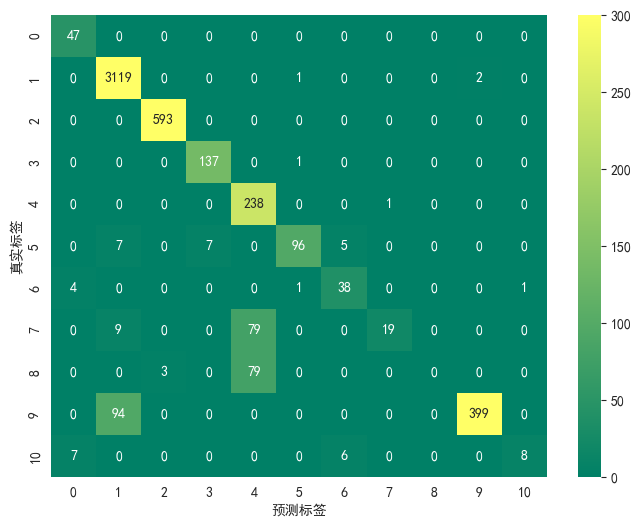

In [18]:
# 绘制热力图
# fmt参数用于指定数值的格式
# cmap参数用于指定颜色映射
# annot参数用于指定是否在热力图中显示数值
# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(c, annot=True, cmap='summer', fmt='d', vmax=300)
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()